### Gradient Boosting Machines Algorithm
Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Gradient boosting is also known as gradient tree boosting, stochastic gradient boosting (an extension), and gradient boosting machines, or GBM for short.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network.

One way to produce a weighted combination of classifiers which optimizes [the cost] is by gradient descent in function space

— Boosting Algorithms as Gradient Descent in Function Space, 1999.

Naive gradient boosting is a greedy algorithm and can overfit the training dataset quickly.

It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting.

There are three types of enhancements to basic gradient boosting that can improve performance:

 - Tree Constraints: such as the depth of the trees and the number of trees used in the ensemble.
 - Weighted Updates: such as a learning rate used to limit how much each tree contributes to the ensemble.
 - Random sampling: such as fitting trees on random subsets of features and samples.
 
The use of random sampling often leads to a change in the name of the algorithm to “stochastic gradient boosting.”

### Gradient Boosting Scikit-Learn API

In [1]:
import sklearn
print(sklearn.__version__)

0.20.0


### Gradient Boosting for Classification

In [2]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [3]:
# evaluate gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

# define the model
model = GradientBoostingClassifier()

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.898 (0.025)


In [4]:
# make predictions using gradient boosting for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

# define the model
model = GradientBoostingClassifier()

# fit the model on the whole dataset
model.fit(X, y)

# make a single prediction
row = [0.2929949, -4.21223056, -1.288332, -2.17849815, -0.64527665, 2.58097719, 0.28422388, -7.1827928, -1.91211104, 2.73729512, 0.81395695, 3.96973717, -2.66939799, 3.34692332, 4.19791821, 0.99990998, -0.30201875, -4.43170633, -2.82646737, 0.44916808]
yhat = model.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


### Gradient Boosting for Regression

In [5]:
# test regression dataset
from sklearn.datasets import make_regression

# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)

# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [6]:
# evaluate gradient boosting ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)

# define the model
model = GradientBoostingRegressor()

# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -62.487 (3.273)


In [7]:
# gradient boosting ensemble for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)

# define the model
model = GradientBoostingRegressor()

# fit the model on the whole dataset
model.fit(X, y)

# make a single prediction
row = [0.20543991, -0.97049844, -0.81403429, -0.23842689, -0.60704084, -0.48541492, 0.53113006, 2.01834338, -0.90745243, -1.85859731, -1.02334791, -0.6877744, 0.60984819, -0.70630121, -1.29161497, 1.32385441, 1.42150747, 1.26567231, 2.56569098, -0.11154792]
yhat = model.predict([row])

# summarize prediction
print('Prediction: %d' % yhat[0])

Prediction: 37


### Gradient Boosting Hyperparameters

#### Explore Number of Trees

In [8]:
# explore gradient boosting number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
% matplotlib inline

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = GradientBoostingClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 0.834 (0.035)
>5000 0.925 (0.022)
>500 0.921 (0.022)
>1000 0.924 (0.021)
>100 0.897 (0.025)
>50 0.877 (0.032)


<Figure size 640x480 with 1 Axes>

#### Explore Number of Samples

>0.9 0.903 (0.029)
>1.0 0.898 (0.025)
>0.3 0.897 (0.033)
>0.5 0.905 (0.027)
>0.1 0.873 (0.024)
>0.7 0.901 (0.029)
>0.4 0.899 (0.027)
>0.6 0.908 (0.024)
>0.2 0.894 (0.029)
>0.8 0.906 (0.031)


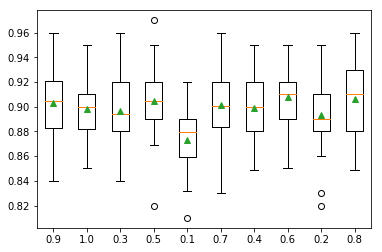

In [9]:
# explore gradient boosting ensemble number of samples effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
% matplotlib inline

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    
    # explore sample ratio from 10% to 100% in 10% increments
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = GradientBoostingClassifier(subsample=i)
        
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    
    # evaluate the model
    scores = evaluate_model(model, X, y)
    
    # store the results
    results.append(scores)
    names.append(name)
    
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Explore Number of Features

>3 0.896 (0.028)
>12 0.895 (0.029)
>2 0.884 (0.034)
>5 0.896 (0.029)
>13 0.898 (0.023)
>15 0.901 (0.030)
>7 0.897 (0.031)
>11 0.898 (0.029)
>9 0.901 (0.028)
>6 0.894 (0.028)
>20 0.900 (0.025)
>8 0.899 (0.028)
>10 0.896 (0.026)
>4 0.892 (0.029)
>19 0.898 (0.028)
>16 0.897 (0.029)
>1 0.869 (0.030)
>18 0.899 (0.027)
>17 0.901 (0.028)
>14 0.901 (0.027)


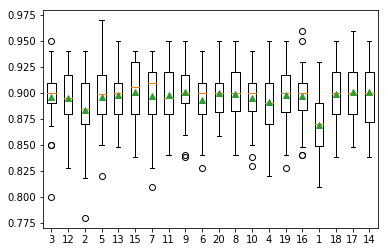

In [10]:
# explore gradient boosting number of features on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
% matplotlib inline

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    
    # explore number of features from 1 to 20
    for i in range(1,21):
        models[str(i)] = GradientBoostingClassifier(max_features=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    
    # evaluate the model
    scores = evaluate_model(model, X, y)
    
    # store the results
    results.append(scores)
    names.append(name)
    
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Explore Learning Rate

>0.0100 0.832 (0.030)
>0.0010 0.783 (0.037)
>0.1000 0.898 (0.025)
>0.0001 0.766 (0.050)
>1.0000 0.906 (0.031)


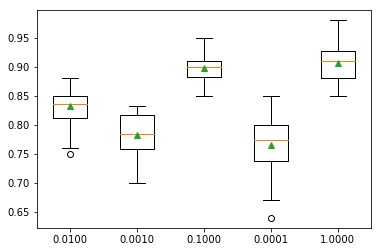

In [11]:
# explore gradient boosting ensemble learning rate effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    
    # define learning rates to explore
    for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
        key = '%.4f' % i
        models[key] = GradientBoostingClassifier(learning_rate=i)
        
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    
    # evaluate the model
    scores = evaluate_model(model, X, y)
    
    # store the results
    results.append(scores)
    names.append(name)
    
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Explore Tree Depth

>3 0.899 (0.025)
>7 0.912 (0.025)
>8 0.893 (0.027)
>10 0.833 (0.036)
>4 0.910 (0.031)
>5 0.918 (0.027)
>1 0.834 (0.037)
>2 0.879 (0.029)
>9 0.844 (0.040)
>6 0.915 (0.029)


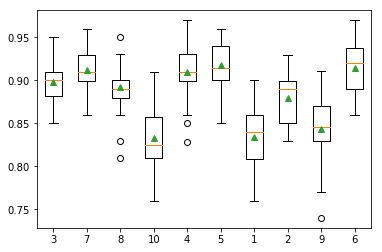

In [13]:
# explore gradient boosting tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    
    # define max tree depths to explore between 1 and 10
    for i in range(1,11):
        models[str(i)] = GradientBoostingClassifier(max_depth=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    
    # evaluate the model
    scores = evaluate_model(model, X, y)
    
    # store the results
    results.append(scores)
    names.append(name)
    
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Grid Search Hyperparameters

In [14]:
# example of grid searching key hyperparameters for gradient boosting on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

# define the model with default hyperparameters
model = GradientBoostingClassifier()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(X, y)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.942000 using {'n_estimators': 500, 'subsample': 0.5, 'learning_rate': 0.1, 'max_depth': 9}
0.501000 (0.002000) with: {'n_estimators': 10, 'subsample': 0.5, 'learning_rate': 0.0001, 'max_depth': 3}
0.501000 (0.002000) with: {'n_estimators': 10, 'subsample': 0.7, 'learning_rate': 0.0001, 'max_depth': 3}
0.501000 (0.002000) with: {'n_estimators': 10, 'subsample': 1.0, 'learning_rate': 0.0001, 'max_depth': 3}
0.782667 (0.044231) with: {'n_estimators': 50, 'subsample': 0.5, 'learning_rate': 0.0001, 'max_depth': 3}
0.781333 (0.037077) with: {'n_estimators': 50, 'subsample': 0.7, 'learning_rate': 0.0001, 'max_depth': 3}
0.733000 (0.053377) with: {'n_estimators': 50, 'subsample': 1.0, 'learning_rate': 0.0001, 'max_depth': 3}
0.828667 (0.031875) with: {'n_estimators': 100, 'subsample': 0.5, 'learning_rate': 0.0001, 'max_depth': 3}
0.821667 (0.029599) with: {'n_estimators': 100, 'subsample': 0.7, 'learning_rate': 0.0001, 'max_depth': 3}
0.765667 (0.050365) with: {'n_estimators': 100, 'su